**Homework 20**

In the next assignment you will create a Convolutional Neural Network to do facial recognition. This will use a large dataset of face photos, which we'll explore here. As this is a very large dataset, and may take a while to load. Once it is complete we will just look at a subset, consisting of people for whom there are at least 70 photos.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
faces=lfw_people.images
names=lfw_people.target_names
target=lfw_people.target

for name in names:
  print(name)

faces.shape

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


(1288, 50, 37)

You see there are a total of 1288 images, each is 50-by-37 pixels, representing seven people. Let's take a look at one:

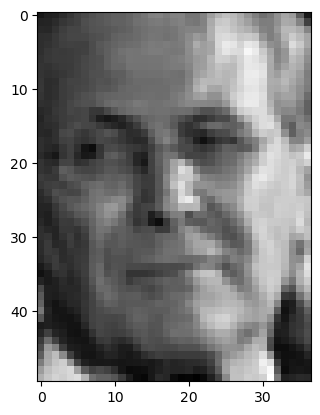

In [50]:
plt.imshow(faces[11],cmap='gray')

In [51]:
target[11]

2

You see the target for image 10 is the number 3. Notice that President George W. Bush (the man in the photo) is the 3rd name on the list above (counting from 0). For convenience, we will name this image `bush`:

In [52]:
bush=faces[10]

To create a CNN, you must understand two operations: convolution and pooling. Write a `Conv` function that takes two arguments, image and filter. Both will be 2-dimensional numpy arrays. Your function should return the convolution of the image array by the filter array.

In [53]:
def Conv(image,kernel):
    # print("image"); print(image)
    # print(kernel)
    # print(image.shape)
    # print(kernel.shape)
    cols = image.shape[1] - kernel.shape[1] 
    rows = image.shape[0] - kernel.shape[0]
    kershape = kernel.shape
    conv = np.zeros((rows,cols))
    for row in range(rows):
        for col in range(cols):
            cur_im = image[row: kershape[0]+row, col: kershape[1] + col]
            conv[row,col] = np.sum(cur_im*kernel)

    return conv

To see the effect of your code, we define a 7-by-7 kernel:

In [54]:
kernel=np.zeros((7,7))
kernel[3,:]=1
kernel

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

We now apply this filter to the image of George Bush.

In [55]:
Conv(bush, kernel)

array([[3.50980398, 3.63790858, 3.69934651, ..., 3.69019616, 3.50326803,
        3.36732036],
       [3.51241845, 3.5307191 , 3.52549034, ..., 3.52941182, 3.44444454,
        3.3712419 ],
       [3.52941191, 3.50980404, 3.49150339, ..., 3.44183016, 3.41176477,
        3.39477134],
       ...,
       [1.53071903, 1.87320268, 2.18562098, ..., 1.2797386 , 0.96339872,
        0.78039217],
       [1.40392159, 1.75816998, 2.0797386 , ..., 1.03398695, 0.78431374,
        0.68366014],
       [1.37254905, 1.71503273, 2.07320269, ..., 0.80130721, 0.64313727,
        0.6026144 ]])

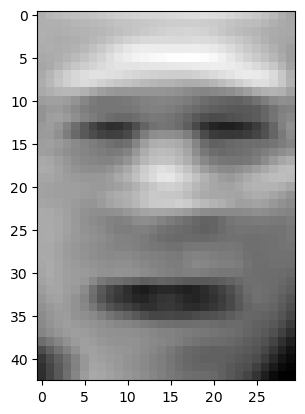

In [56]:
plt.imshow(Conv(bush,kernel),cmap='gray')

You can see this kernel has the effect of horizontally smearing the image.

The next element of a CNN is a way to downsample the image to something of lower resolution. Implement a `MaxPool` function which takes an image and a tuple called "pool_size". If the pool_size is (n,m), then the function should output a lower resolution image where each n-by-m window of the original is replaced by a single pixel whose intensity is the maximum value in the window.

In [64]:
def MaxPool(image, pool_size):
    # Calculate output dimensions
    rows = image.shape[0] // pool_size[0]
    cols = image.shape[1] // pool_size[1]
    
    # Create output array
    max_pool = np.zeros((rows, cols))
    
    # Iterate through each position in the output array
    for row in range(rows):
        for col in range(cols):
            # Calculate corresponding region in input image
            row_start = row * pool_size[0]
            row_end = row_start + pool_size[0]
            col_start = col * pool_size[1]
            col_end = col_start + pool_size[1]
            
            # Extract region and find maximum
            cur_im = image[row_start:row_end, col_start:col_end]
            max_pool[row, col] = np.max(cur_im)
    
    return max_pool

In [65]:
c = Conv(bush,kernel)
mp = MaxPool(c, (2,2))

In [66]:
row = 0; col = 0
pool_size = (2,2)
bush[row: pool_size[0] + row, col: pool_size[1] + col]

array([[0.3882353 , 0.3895425 ],
       [0.37254903, 0.3895425 ]], dtype=float32)

We can see the effect of this by applying it to the smeared image of Bush:

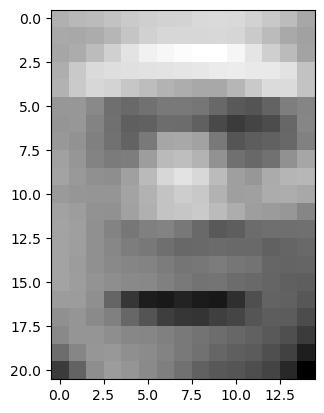

In [67]:
plt.imshow(MaxPool(Conv(bush,kernel),(2,2)),cmap='gray')

Most of the features are now gone, but the basic mouth shape is still there. Hence, this particular kernel, followed by a MaxPooling, may be good at picking out mouth shapes. A different kernel might be useful for picking out eye shapes, nose shapes, etc.